# doing EDA and preprocessing of dataset

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [3]:
# Load dataset
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return json.load(f)

# Doing EDA

In [4]:
train_data = load_data("train.json")
val_data = load_data("valid.json")
test_data = load_data("test.json")

In [ ]:
train_data[0]

{'uri': '4367393',
 'question': 'what is parkinesonism?',
 'context': '',
 'answers': ['u spelt it wrong !!\nParkinson\'s disease is one of the most common neurologic disorders of the elderly. The term "parkinsonism" refers to any condition that causes any combination of the types of movement abnormalities seen in Parkinson\'s disease by damaging or destroying dopamine neurons in a certain area of the brain.',
  "Parkinsonism describes the common symptoms of Parkinson's disease - tremor, rigidity, akinesia or bradykinesia and postural instability. Those patients who respond to drug treatment for Parkinson's disease are diagnosed with it, and those who do not have parkinsonism."],
 'labelled_answer_spans': {'INFORMATION': [{'txt': 'Parkinson\'s disease is one of the most common neurologic disorders of the elderly. The term "parkinsonism" refers to any condition that causes any combination of the types of movement abnormalities seen in Parkinson\'s disease by damaging or destroying dopam

In [ ]:
test_data[0]

{'uri': '1309809',
 'question': 'what is orgasm?',
 'context': '',
 'answers': ['An orgasm, also known as a sexual climax, is a pleasurable physical, psychological or emotional response to prolonged sexual stimulation. It is often accompanied by a notable physiological reaction, such as ejaculation, blushing or spasm and may be followed by aftershocks.\n\nDictionaries still give the subsidiary meaning, "a similar point of intensity of emotional excitement," but as of 2005 this usage has become obscure. It can be startling to modern readers when encountered in older literature.\n\n\nGeneral\nBoth males and females can experience orgasm, but the exact response varies across gender. Generally speaking, orgasm is the third stage of four in the human sexual response cycle, which is the currently accepted model of the physiological process of sexual stimulation',
  'You asked two questions that you might think are the same; but they are not. Orgasm is an experience resulting from the combine

In [5]:
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)
test_df = pd.DataFrame(test_data)

In [ ]:
train_df.head()

,uri,question,context,answers,labelled_answer_spans,labelled_summaries,raw_text
0,4367393,what is parkinesonism?,,[u spelt it wrong !!\nParkinson's disease is o...,{'INFORMATION': [{'txt': 'Parkinson's disease ...,{'INFORMATION_SUMMARY': 'Parkinson's disease i...,uri: 4367393\nquestion: what is parkinesonism?...
1,1504599,"I scream, shout and swear in my sleep. How do ...",My mom always told me that I talk a lot in my ...,[hmm i would say duck tape but thats a lil to ...,"{'SUGGESTION': [{'txt': 'duck tape', 'label_sp...",{'CAUSE_SUMMARY': 'Shouting during sleep may b...,"uri: 1504599\nquestion: I scream, shout and sw..."
2,1701378,what does m.c.h.c stand for in my hematology t...,,"[Mean Corpuscular Hemoglobin Concentration\n""T...",{'INFORMATION': [{'txt': ': Mean Corpuscular H...,{'INFORMATION_SUMMARY': 'For information purpo...,uri: 1701378\nquestion: what does m.c.h.c stan...
3,45070,whats the best way to clear pluged up sinuses?,,[i use a nasal bulb and saline water. 1/8 teas...,{'SUGGESTION': [{'txt': 'i use a nasal bulb an...,{'SUGGESTION_SUMMARY': 'One individual recomme...,uri: 45070\nquestion: whats the best way to cl...
4,1752893,Are their any good home remedies for tooth pain?,,[Clove Oil from a health store works really we...,{'SUGGESTION': [{'txt': 'try putting a wet tea...,"{'EXPERIENCE_SUMMARY': 'In users expereince, o...",uri: 1752893\nquestion: Are their any good hom...


In [ ]:
train_df.shape

(2236, 7)

In [ ]:
test_df.shape

(640, 7)

In [ ]:
val_df.shape

(959, 7)

In [ ]:
val_df.head()

,uri,question,context,answers,labelled_answer_spans,labelled_summaries,raw_text
0,3392171,do braces hurt????,pain?\nhard to talk?,[yes yes yes. But not horribly painful. you ge...,{'EXPERIENCE': [{'txt': ': yes yes yes. But no...,{'EXPERIENCE_SUMMARY': 'The various experience...,uri: 3392171\nquestion: do braces hurt????\nco...
1,1100363,i need sum serious answer??,ok .. i play sports all muh life .. yeah.. n i...,[That might be because you're eating more ener...,{'INFORMATION': [{'txt': 'you're eating more e...,{'INFORMATION_SUMMARY': 'Excessive calorie int...,uri: 1100363\nquestion: i need sum serious ans...
2,1626376,"What are the symptoms of depression, I'm 60 ye...",,"[Feeling lethargic, sad, or like you don't wan...","{'INFORMATION': [{'txt': 'eeling lethargic, sa...",{'CAUSE_SUMMARY': 'Depression during menopause...,uri: 1626376\nquestion: What are the symptoms ...
3,744844,Why do they tell you not to take vitamens befo...,Im getting a check-up for life insurance and t...,[I agree. Some diseases are a result of vitami...,{'INFORMATION': [{'txt': 'Some diseases are a ...,"{'INFORMATION_SUMMARY': 'Taking vitamins, espe...",uri: 744844\nquestion: Why do they tell you no...
4,1765936,Why would a newborn child get johndus?Why yell...,,[Many children are born with JAUNDICE. When t...,{'INFORMATION': [{'txt': 'Many children are bo...,{'INFORMATION_SUMMARY': 'Jaundice is a common ...,uri: 1765936\nquestion: Why would a newborn ch...


In [ ]:
context_missing = train_df['context'].apply(lambda x: len(x) == 0).sum()

In [ ]:
print(f"Missing Context Count: {context_missing}")

Missing Context Count: 1415


# PLotting count distrubtion of perpectives in train_df

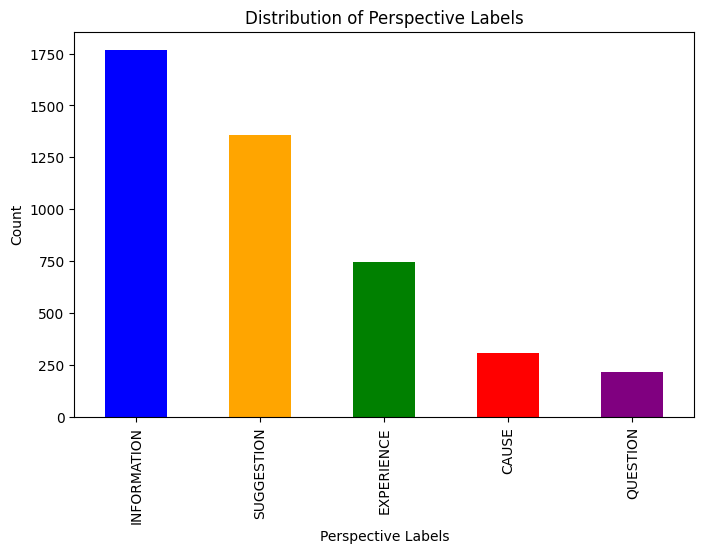

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each perspective
label_counts = train_df['labelled_answer_spans'].explode().value_counts()

# Plot the distribution
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Perspective Labels")
plt.ylabel("Count")
plt.title("Distribution of Perspective Labels")
plt.show()


# plotting distribution of answer lengths

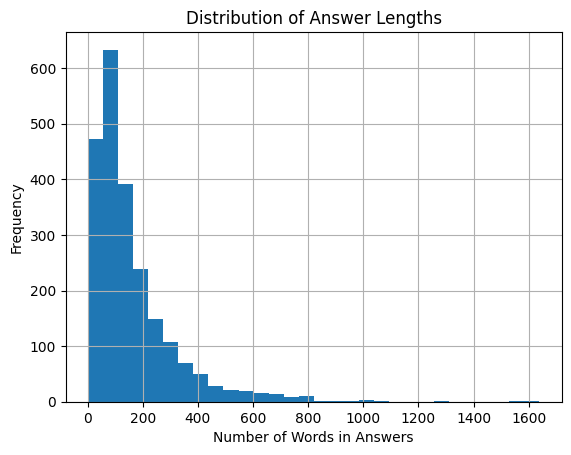

In [ ]:
train_df['answer_length'] = train_df['answers'].apply(lambda x: len(str(x).split()))
train_df['answer_length'].hist(bins=30)
plt.xlabel("Number of Words in Answers")
plt.ylabel("Frequency")
plt.title("Distribution of Answer Lengths")
plt.show()


# count of each perpective in train_df

In [ ]:
label_counts = train_df['labelled_answer_spans'].explode().value_counts()

# Print the counts for each perspective
for label, count in label_counts.items():
    print(f"Perspective: {label}, Count: {count}")

Perspective: INFORMATION, Count: 1767
Perspective: SUGGESTION, Count: 1360
Perspective: EXPERIENCE, Count: 747
Perspective: CAUSE, Count: 308
Perspective: QUESTION, Count: 215


# Distribution of answers per question

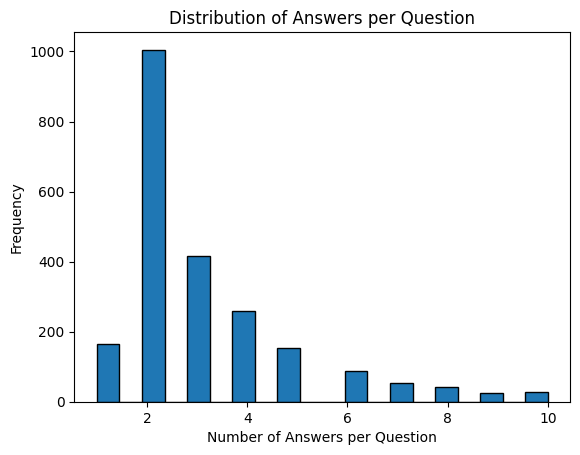

In [ ]:
# Calculate the number of answers for each question
answers_per_question = train_df['answers'].apply(len)

# Create the histogram
plt.hist(answers_per_question, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel("Number of Answers per Question")
plt.ylabel("Frequency")
plt.title("Distribution of Answers per Question")
plt.show()

# Basic preprocessing on train dataset

# Handling missing values and creating the input and output pairs

In [7]:
import pandas as pd

def create_input_output_pairs(df):
    """
    Creates input-output pairs for summarization, handling multiple perspectives.

    Args:
        df (pd.DataFrame): DataFrame containing the data with columns
                           'question', 'context', 'answers', 'labelled_answer_spans',
                           and 'labelled_summaries'.

    Returns:
        tuple: A tuple containing two lists: input_texts and output_texts.
    """
    input_texts = []
    output_texts = []

    for index, row in df.iterrows():
        question = row['question']
        context = row.get('context', "") if 'context' in row and pd.notna(row.get('context', None)) else ""
        answers = " ".join(row.get('answers', []))  # Concatenate answers, handle missing
        perspectives = row.get('labelled_answer_spans', [])  # List of perspectives, handle missing
        summaries = row.get('labelled_summaries', {})  # Dictionary of perspective-based summaries, handle missing

        for perspective in perspectives:
            perspective = str(perspective)  # Ensure perspective is a string
            perspective_key = f"{perspective}_SUMMARY"
            if perspective_key in summaries:
                input_text = f"Summarize from the {perspective} perspective: {context} Question: {question} Answers: {answers}"  # More informative prompt
                output_text = summaries[perspective_key]

                input_texts.append(input_text)
                output_texts.append(output_text)

    return input_texts, output_texts




In [8]:
input_texts, output_texts = create_input_output_pairs(train_df)

In [ ]:
input_texts[0]

'Summarize from the INFORMATION perspective:  Question: what is parkinesonism? Answers: u spelt it wrong !!\nParkinson\'s disease is one of the most common neurologic disorders of the elderly. The term "parkinsonism" refers to any condition that causes any combination of the types of movement abnormalities seen in Parkinson\'s disease by damaging or destroying dopamine neurons in a certain area of the brain. Parkinsonism describes the common symptoms of Parkinson\'s disease - tremor, rigidity, akinesia or bradykinesia and postural instability. Those patients who respond to drug treatment for Parkinson\'s disease are diagnosed with it, and those who do not have parkinsonism.'

In [ ]:
for i in range(5):  #printing first 4 input and output texts
         print(f"Input {i + 1}:\n{input_texts[i]}\n")
         print(f"Output {i + 1}:\n{output_texts[i]}\n")

Input 1:
Summarize from the INFORMATION perspective:  Question: what is parkinesonism? Answers: u spelt it wrong !!
Parkinson's disease is one of the most common neurologic disorders of the elderly. The term "parkinsonism" refers to any condition that causes any combination of the types of movement abnormalities seen in Parkinson's disease by damaging or destroying dopamine neurons in a certain area of the brain. Parkinsonism describes the common symptoms of Parkinson's disease - tremor, rigidity, akinesia or bradykinesia and postural instability. Those patients who respond to drug treatment for Parkinson's disease are diagnosed with it, and those who do not have parkinsonism.

Output 1:
Parkinson's disease is a prevalent neurologic disorder among the elderly. The term "parkinsonism" encompasses any condition leading to movement abnormalities similar to those observed in Parkinson's disease. This condition arises from the damage or destruction of dopamine neurons in a specific brain re

In [ ]:
output_texts[0]

'Parkinson\'s disease is a prevalent neurologic disorder among the elderly. The term "parkinsonism" encompasses any condition leading to movement abnormalities similar to those observed in Parkinson\'s disease. This condition arises from the damage or destruction of dopamine neurons in a specific brain region. Common symptoms of parkinsonism include tremors, rigidity, akinesia or bradykinesia, and postural instability. Diagnosis of Parkinson\'s disease is established in patients responding to drug treatments, while those who do not respond are categorized under parkinsonism.'

In [ ]:
input_texts, output_texts = create_input_output_pairs(train_df)
print(f"Number of input texts: {len(input_texts)}")
print(f"Number of output texts: {len(output_texts)}")

Number of input texts: 4360
Number of output texts: 4360


# Tokenizer Initialization

In [9]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [8]:
ex = "i am dhairya , tokenise it now"
tokenizer(ex)

{'input_ids': [3, 23, 183, 3, 26, 19176, 63, 9, 3, 6, 14145, 159, 15, 34, 230, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
print(len(input_texts))
print(len(output_texts))

4360
4360


# tokenizing input and output texts and converting them to tensors

In [10]:
def tokenize_and_combine(input_texts, output_texts, tokenizer,
                         max_input_length=512, max_output_length=128):
    """
    Tokenize all input_texts and output_texts at once, then return concatenated tensors.
    This avoids creating a separate batch dimension for each chunk.
    """
    # Tokenize all inputs at once
    tokenized_inputs = tokenizer(
        input_texts,
        padding=True,
        truncation=True,
        max_length=max_input_length,
        return_tensors="pt",
    )

    # Tokenize all outputs at once
    tokenized_outputs = tokenizer(
        output_texts,
        padding=True,
        truncation=True,
        max_length=max_output_length,
        return_tensors="pt",
    )

    return tokenized_inputs, tokenized_outputs


In [11]:
tokenized_inputs, tokenized_outputs = tokenize_and_combine(
    input_texts, output_texts, tokenizer
)

In [ ]:
print(f"Number of input encodings: {len(tokenized_inputs)}")
print(f"Number of output encodings: {len(tokenized_outputs)}")

Number of input encodings: 2
Number of output encodings: 2


In [ ]:
tokenized_inputs

{'input_ids': tensor([[12198,  1635,  1737,  ...,     0,     0,     0],
        [12198,  1635,  1737,  ...,    11,  2093,     1],
        [12198,  1635,  1737,  ...,   706,     6,     1],
        ...,
        [12198,  1635,  1737,  ...,     0,     0,     0],
        [12198,  1635,  1737,  ...,     0,     0,     0],
        [12198,  1635,  1737,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
tokenized_outputs

{'input_ids': tensor([[25904,    31,     7,  ..., 28295,   365,     1],
        [   94,    19,  5259,  ...,    13,     3,     1],
        [ 4488,   670,    53,  ...,     0,     0,     0],
        ...,
        [15374,  1035,  1058,  ...,     0,     0,     0],
        [  878,   115,    42,  ...,     0,     0,     0],
        [  242,   251,  3659,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [12]:
from torch.utils.data import Dataset
class SummarizationDataset(Dataset):
    """
    Stores all tokenized data as flattened tensors, so that
    each __getitem__ returns a single sample (seq_len) for input_ids, labels, etc.
    """
    def __init__(self, tokenized_inputs, tokenized_outputs):
        # Flatten everything into a single set of tensors
        # tokenized_inputs["input_ids"] shape => [total_samples, seq_len]
        self.input_ids = tokenized_inputs["input_ids"]
        self.attention_mask = tokenized_inputs["attention_mask"]
        # T5 uses the 'labels' argument for the output (decoder) side
        self.labels = tokenized_outputs["input_ids"]

    def __len__(self):
        return self.input_ids.shape[0]

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx],
        }


In [13]:
train_dataset = SummarizationDataset(tokenized_inputs, tokenized_outputs)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

In [ ]:
len(train_dataset)

4360

In [ ]:
len(train_dataloader)

2180

# calling the model Flan-T5

In [13]:
from transformers import T5ForConditionalGeneration
import torch # Import the torch module

# Load Model
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

# Move Model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the model
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=3e-5)

# Track Loss
epochs = 3
model.train()
train_losses = []

for epoch in range(epochs):
    total_loss = 0
    loop = tqdm(train_dataloader, leave=True)
    for batch in loop:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backpropogation
        loss.backward()
        optimizer.step()

        # Record the loss
        total_loss += loss.item()

        # Update progress bar
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())
        # train_losses.append(loss.item())

      # Calculate average loss for the epoch
    avg_epoch_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_epoch_loss)

torch.save(model.state_dict(), "flan-t5-finetuned.pth")
# Plot the training loss (loss vs. epochs)
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 3: 100%|██████████| 2180/2180 [14:45<00:00,  2.46it/s, loss=0.841]


NameError: name 'epoch_losses' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from google.colab import drive # Import the drive module
drive.mount('/content/drive') # Mount Google Drive

# Save the model to Google Drive
model_save_path = '/content/drive/My Drive/Colab Notebooks/flan-t5-finetuned.pth'
torch.save(model.state_dict(), model_save_path)

Mounted at /content/drive


In [ ]:
test_df.head()

,uri,question,context,answers,labelled_answer_spans,labelled_summaries,raw_text
0,1309809,what is orgasm?,,"[An orgasm, also known as a sexual climax, is ...","{'INFORMATION': [{'txt': 'An orgasm, also know...",{'INFORMATION_SUMMARY': 'For information purpo...,uri: 1309809\nquestion: what is orgasm?\nconte...
1,1846165,when mutiple women live in the same house for ...,when mutiple women live in the same house for ...,"[Apparently so., they sure do. and call it a ...",{'INFORMATION': [{'txt': 'es it is true! This...,{'INFORMATION_SUMMARY': 'For information purpo...,uri: 1846165\nquestion: when mutiple women liv...
2,1564117,I am extremely tired and an slowly gaining wei...,"I am 27, very active!Recently married",[it sounds alot like hypothyroidism which meen...,"{'CAUSE': [{'txt': 'hypothyroidism', 'label_sp...","{'INFORMATION_SUMMARY': 'Hypothyroidism, chara...",uri: 1564117\nquestion: I am extremely tired a...
3,1108386,What are the leading factors for an inability ...,The subject runs 3 miles/day and eats a low ca...,[It is possible to not eat enough to keep your...,{'INFORMATION': [{'txt': 'It is possible to no...,{'INFORMATION_SUMMARY': 'Insufficient calorie ...,uri: 1108386\nquestion: What are the leading f...
4,3378987,how can you releive sciatic pain?,,"[Manual treatments for sciatica, including phy...",{'INFORMATION': [{'txt': 'Manual treatments fo...,{'INFORMATION_SUMMARY': 'For information purpo...,uri: 3378987\nquestion: how can you releive sc...


In [ ]:
test_df.shape

(640, 7)

# calculating the BLUE score on test dataset

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Load trained model & tokenizer
model = T5ForConditionalGeneration.from_pretrained("flan-t5-finetuned")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()
def generate_summary(input_text):
    """
    Generate a summary for the given input text using the fine-tuned Flan-T5 model.
    """
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    summary_ids = model.generate(inputs["input_ids"], max_length=128)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Extract test input-output pairs
test_input_texts, test_output_texts = create_input_output_pairs(test_df)

# Generate summaries for all test inputs
generated_summaries = [generate_summary(text) for text in test_input_texts]

# Print a few examples for inspection
for i in range(3):  # Show first 3 examples
    print(f"\n Input {i+1}: {test_input_texts[i]}")
    print(f" Generated Summary {i+1}: {generated_summaries[i]}")
    print(f" Ground Truth {i+1}: {test_output_texts[i]}")



🔹 Input 1: Summarize from the INFORMATION perspective:  Question: what is orgasm? Answers: An orgasm, also known as a sexual climax, is a pleasurable physical, psychological or emotional response to prolonged sexual stimulation. It is often accompanied by a notable physiological reaction, such as ejaculation, blushing or spasm and may be followed by aftershocks.

Dictionaries still give the subsidiary meaning, "a similar point of intensity of emotional excitement," but as of 2005 this usage has become obscure. It can be startling to modern readers when encountered in older literature.


General
Both males and females can experience orgasm, but the exact response varies across gender. Generally speaking, orgasm is the third stage of four in the human sexual response cycle, which is the currently accepted model of the physiological process of sexual stimulation You asked two questions that you might think are the same; but they are not. Orgasm is an experience resulting from the combine

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Compute BLEU score for each generated summary
bleu_scores = [sentence_bleu([ref.split()], gen.split()) for ref, gen in zip(test_output_texts, generated_summaries)]

# Compute average BLEU score
avg_bleu = sum(bleu_scores) / len(bleu_scores)

print(f"\n🔹 Average BLEU Score: {avg_bleu:.4f}")


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


🔹 Average BLEU Score: 0.0786


# calculating the BLUE score on validation dataset

In [ ]:
# Preprocess validation data into input-output pairs
val_input_texts, val_output_texts = create_input_output_pairs(val_df)


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Load trained model & tokenizer
model = T5ForConditionalGeneration.from_pretrained("flan-t5-finetuned")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()


T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [ ]:
val_df.shape

(959, 7)

In [ ]:
def generate_summary(input_text):
    """
    Generate a summary for the given input text using the fine-tuned Flan-T5 model.
    """
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    summary_ids = model.generate(inputs["input_ids"], max_length=128)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Generate summaries for validation data
val_generated_summaries = [generate_summary(text) for text in val_input_texts]

# Print a few examples for inspection
for i in range(3):  # Show 3 examples
    print(f"\n Input {i+1}: {val_input_texts[i]}")
    print(f"Generated Summary {i+1}: {val_generated_summaries[i]}")
    print(f"Ground Truth {i+1}: {val_output_texts[i]}")



🔹 Input 1: Summarize from the EXPERIENCE perspective: pain?
hard to talk? Question: do braces hurt???? Answers: yes yes yes. But not horribly painful. you get used to them and they become easier to talk with. the pain is only when they get tightened and until you get used to them. They give you wax to put around the spots that hurt you when your tongue rubs against the brackets and you won't feel the pain. They hurt for a bit when you first get them.They feel tight.Then, they settle down. However, they hurt each time you get them adjusted for a few days afterward. But,dont worry,you'll get used to the pain. yes yes they hurt when u first get them but then u get used 2 them really  easily. sometimes u like drool or spit or something but unless u have a pallete expander u can talk normal. if u have 1 ur "K's" get all screwed up. Yes THEy HuRt WhEn YoU fIrSt GeT them but just for a few days...If you eat something hard and it gets stuck in them it mite hurt...and also after youy get them 

In [ ]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# Tokenize references and hypotheses properly
val_reference_summaries = [[ref.split()] for ref in val_output_texts]  # List of lists (BLEU requires multiple references)
val_generated_summaries = [gen.split() for gen in val_generated_summaries]  # Tokenized generated summaries

# Apply Smoothing (Common in NLP Papers)
smooth_fn = SmoothingFunction().method4

# Compute BLEU-4 Score with smoothing
val_bleu_score = corpus_bleu(val_reference_summaries, val_generated_summaries, smoothing_function=smooth_fn)

print(f"\n🔹 BLEU Score on Validation Set: {val_bleu_score:.4f}")



🔹 BLEU Score on Validation Set: 0.0855


In [12]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.2 MB/s eta 0:00:00


In [14]:
import torch
import sacrebleu
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

test_input_texts, test_reference_texts = create_input_output_pairs(test_df)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

baseline_model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")
baseline_model.eval()
baseline_model.to(device)

baseline_tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

predictions_baseline = []
references_baseline = []

for inp_text, ref_text in zip(test_input_texts, test_reference_texts):
    inputs = baseline_tokenizer.encode(inp_text, return_tensors="pt", max_length=512, truncation=True).to(device)
    with torch.no_grad():
        outputs = baseline_model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
    pred_text = baseline_tokenizer.decode(outputs[0], skip_special_tokens=True)

    predictions_baseline.append(pred_text)
    references_baseline.append([ref_text])  # sacrebleu expects list of lists

bleu_baseline = sacrebleu.corpus_bleu(predictions_baseline, references_baseline)
print("Zero-Shot Baseline Flan-T5 BLEU:", bleu_baseline.score)




Zero-Shot Baseline Flan-T5 BLEU: 0.0


In [22]:
for i in range(min(5, len(predictions_baseline))):
    print("=========================================")
    print(f"Zero-Shot Baseline Example {i+1}")
    print("-----------------------------------------")
    print("Input Text:")
    print(test_input_texts[i])
    print("-----------------------------------------")
    print("Reference Summary:")
    print(test_reference_texts[i])
    print("-----------------------------------------")
    print("Zero-Shot Baseline Prediction:")
    print(predictions_baseline[i])
    print("=========================================\n")

Zero-Shot Baseline Example 1
-----------------------------------------
Input Text:
Summarize from the INFORMATION perspective:  Question: what is orgasm? Answers: An orgasm, also known as a sexual climax, is a pleasurable physical, psychological or emotional response to prolonged sexual stimulation. It is often accompanied by a notable physiological reaction, such as ejaculation, blushing or spasm and may be followed by aftershocks.

Dictionaries still give the subsidiary meaning, "a similar point of intensity of emotional excitement," but as of 2005 this usage has become obscure. It can be startling to modern readers when encountered in older literature.


General
Both males and females can experience orgasm, but the exact response varies across gender. Generally speaking, orgasm is the third stage of four in the human sexual response cycle, which is the currently accepted model of the physiological process of sexual stimulation You asked two questions that you might think are the sam

In [14]:
import sacrebleu

bleu_baseline = sacrebleu.corpus_bleu(
    predictions_baseline,
    references_baseline,
    smooth_method="add-k",
    smooth_value=1.0
)
print("Zero-Shot Baseline Flan-T5 BLEU (with smoothing):", bleu_baseline.score)

Zero-Shot Baseline Flan-T5 BLEU (with smoothing): 35.25065709675943


In [15]:
from bert_score import score

P, R, F1 = score(predictions_baseline, test_reference_texts, lang="en")
print(f"\n🔹 BERTScore (F1): {F1.mean().item():.4f}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔹 BERTScore (F1): 0.8515


In [16]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:

# 1. Initialize a new model with the original architecture
finetuned_model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

# 2. Load your saved state dict (weights) from Google Drive
finetuned_model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/flan-t5-finetuned.pth"))

# 3. Move model to device
finetuned_model.to(device)
finetuned_model.eval()

finetuned_tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

predictions_finetuned = []
references_finetuned = []

for inp_text, ref_text in zip(test_input_texts, test_reference_texts):
    inputs = finetuned_tokenizer.encode(inp_text, return_tensors="pt", max_length=512, truncation=True).to(device)
    with torch.no_grad():
        outputs = finetuned_model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
    pred_text = finetuned_tokenizer.decode(outputs[0], skip_special_tokens=True)

    predictions_finetuned.append(pred_text)
    references_finetuned.append([ref_text])

bleu_finetuned = sacrebleu.corpus_bleu(predictions_finetuned, references_finetuned)
print("Fine-Tuned Flan-T5 BLEU:", bleu_finetuned.score)


print("=============================")
print("       EVALUATION SUMMARY    ")
print("=============================")
print(f"Zero-Shot Baseline  BLEU: {bleu_baseline.score:.2f}")
print(f"Fine-Tuned Flan-T5  BLEU: {bleu_finetuned.score:.2f}")

Fine-Tuned Flan-T5 BLEU: 30.303666748691317
       EVALUATION SUMMARY    
Zero-Shot Baseline  BLEU: 0.00
Fine-Tuned Flan-T5  BLEU: 30.30


In [21]:
# Print the first 5 samples, or as many as you have
for i in range(min(5, len(predictions_finetuned))):
    print("=========================================")
    print(f"Example {i+1}")
    print("-----------------------------------------")
    print("Input Text:")
    print(test_input_texts[i])
    print("-----------------------------------------")
    print("Reference Summary:")
    print(test_reference_texts[i])
    print("-----------------------------------------")
    print("Fine-Tuned Model's Prediction:")
    print(predictions_finetuned[i])
    print("=========================================\n")

Example 1
-----------------------------------------
Input Text:
Summarize from the INFORMATION perspective:  Question: what is orgasm? Answers: An orgasm, also known as a sexual climax, is a pleasurable physical, psychological or emotional response to prolonged sexual stimulation. It is often accompanied by a notable physiological reaction, such as ejaculation, blushing or spasm and may be followed by aftershocks.

Dictionaries still give the subsidiary meaning, "a similar point of intensity of emotional excitement," but as of 2005 this usage has become obscure. It can be startling to modern readers when encountered in older literature.


General
Both males and females can experience orgasm, but the exact response varies across gender. Generally speaking, orgasm is the third stage of four in the human sexual response cycle, which is the currently accepted model of the physiological process of sexual stimulation You asked two questions that you might think are the same; but they are not